<a href="https://colab.research.google.com/github/christianbaptista/dio-ml-ai-projects/blob/main/tf_data_alternativeimagedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [22]:
# Carregando o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Convertendo as classes de inteiros para uma matrix de binaria
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Imprimindo as classes:

print(f"Number of training images: {x_train.shape}")
print(f"Number of training labels: {y_train.shape}")
print(f"Number of testing images:{x_test.shape}")
print(f"Number of testing labels: {y_test.shape}")

# Esperado:
# Number of training images: (50000, 32, 32, 3)
# Number of training labels: (50000, 10)
# Number of testing images: (10000, 32, 32, 3)
# Number of testing labels: (10000, 10)

Number of training images: (50000, 32, 32, 3)
Number of training labels: (50000, 10)
Number of testing images:(10000, 32, 32, 3)
Number of testing labels: (10000, 10)


In [23]:
# Essas são as classes presentes no CIFAR-10 dataset
#class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [24]:
def load_dataset(is_training=True, IMG_SIZE=32):
    def fn(image, label):
        if is_training:
            image = tf.image.resize(image, (IMG_SIZE + 20, IMG_SIZE + 20)) # Resizing the image into a bigger dimension
            image = tf.image.random_crop(image, (IMG_SIZE, IMG_SIZE, 3)) # Randomly cropping patches from the image
            image = tf.image.random_flip_left_right(image) # Flipping images left and right (augmentation)
        else:
            image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
        # Normalizando imagens
        image = image / 255
        return image, label
    return fn

In [25]:
BATCH_SIZE = 64
_AUTO = tf.data.AUTOTUNE

def prepare_dataset(dataset, is_training=True):
    if is_training:
        dataset = dataset.shuffle(BATCH_SIZE * 10) # Shuffling the dataset
    dataset = dataset.map(load_dataset(is_training, 32), num_parallel_calls=_AUTO) # Loading the dataset
    return dataset.batch(BATCH_SIZE).prefetch(_AUTO) # Batching the dataset and prefetching the next set of data


In [26]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

pipeline_train = prepare_dataset(train_dataset, is_training=True)
pipeline_validation = prepare_dataset(val_dataset, is_training=False)


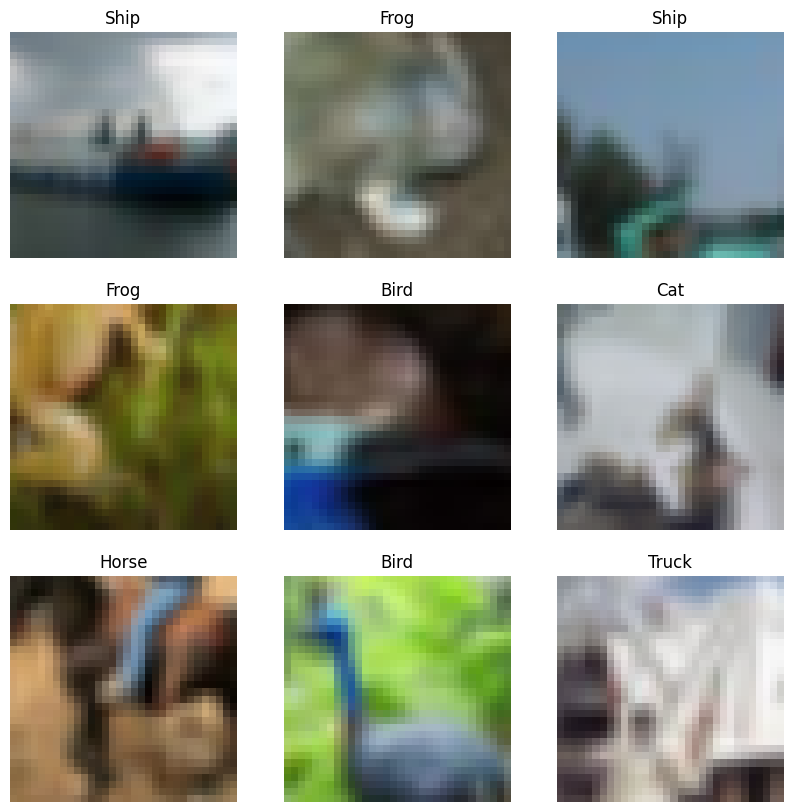

In [27]:
# Visualisando treino e a validação dos dados:
import numpy as np
import matplotlib.pyplot as plt

image_batch, label_batch = next(iter(pipeline_train)) # Fetching the single batch of data from the training pipeline
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.title(class_names[np.argmax(label_batch[i])])
    plt.imshow(image_batch[i])
    plt.axis("off")